# Tutorial
In this tutorial we will walk through and demonstrate the basics of using the module `approximating_maxima` and in particular the methods of the class `ApproximateMaxima`.  

The class `ApproximateMaxima` is used to approximate the maximum value of an unknown, Lipschitz continuous function along an interval $[a,b]$. It offers the ability to optimally select $x$-values at which to evaluate the function to narrow the approximation as well as resources for displaying the results.

Broadly speaking use of the class involves three main steps.
1. Initializing with an interval and Lipschitz constraint.  
2. Selecting and adding points to improve the approximation.
3. Displaying and outputting the results.

This tutorial includes an example of the basic usage of `ApproximateMaxima`, more details on the three mains steps, and a brief overview of some special topics.

## Introduction

### Lipschitz Continuity
Suppose $a$ and $b$ are real numbers and $f:[a,b]\to\mathbb{R}$ is a real-valued function defined on the interval $[a,b]$. We say that $f$ is *Lipschitz continuous* if there exists a real number $M$ such that, for all $x_1$ and $x_2$ in the interval $[a,b]$,
$$|f(x_{1})-f(x_{2})|\leq K|x_{1}-x_{2}|.$$
In this case we call $M$ a Lipschitz constraint of the function $f$. 

When setting the sample function (either at the time of instantiation as follows) please ensure that:

1. Your input is a string.
2. Your equation has only one variable and it is denoted by `x`.
3. Your equation is formatted Pythonically. i.e. Use <em>`'x*x'`</em> to represent the function $x^2$ rather than using `'x^2'`.



## Basic Usage

The following demonstrates the basic usage pattern for the class `AppoximateMaxima`.

### Initializing

In [1]:
# All necessary functions can be accessed as methods of the ApproximateMaxima class.
from approximating_maxima import ApproximateMaxima

# For demonstration purposes we will set a random seed.
import random

random.seed(12)

In [2]:
# First we create an instance of an ApproximateMaxima class object using the desired interval, (0,4), and Lipschitz constraint, 9.
approximation = ApproximateMaxima((0,4),9)

# The parameter sample_function can be set at the time of instantiation or as follows.
approximation.sample_function="pow(x,3)+pow(x,2)"


The function in the above code block is $x^3+x^2$. Note that this is Lipschitz continuous on the interval $[0,4]$ and $9$ is a Lipschitz constraint.

### Adding Points

Points can be added manually or optimally.  If added optimally the $x$-values can be selected one at a time (adaptively) or all at once.  The parameter `function_type` controls how the $y$-values are selected. 

In [3]:
# To add new points to the approximation optimally we call the method add_n_points().
# Here we select the x values one at a time (adaptively) and the y values are chosen at random.
approximation.add_n_points(8,'random', adaptive=True)

### Displaying Results

We can display a table showing how our approximation changed for each of the 8 points added in the above step and then display graphs to help visualize the process.

In [4]:
# The results dataframe stores numerical results. The smaller the radius of information, the better the approximation.
approximation.results_df

,Radius of Information,Least Possible Maximum,Greatest Possible Maximum,Approximated Maximum
Known Points,,,,
1,9.000000,-2.542932,15.457068,6.457068
2,7.110330,1.236408,15.457068,8.346738
3,2.683104,1.870200,7.236408,4.553304
4,2.370110,1.870200,6.610420,4.240310
5,2.211662,1.870200,6.293524,4.081862
6,1.738269,1.870200,5.346738,3.608469
7,0.828830,1.870200,3.527861,2.699031
8,0.314379,2.899104,3.527861,3.213482


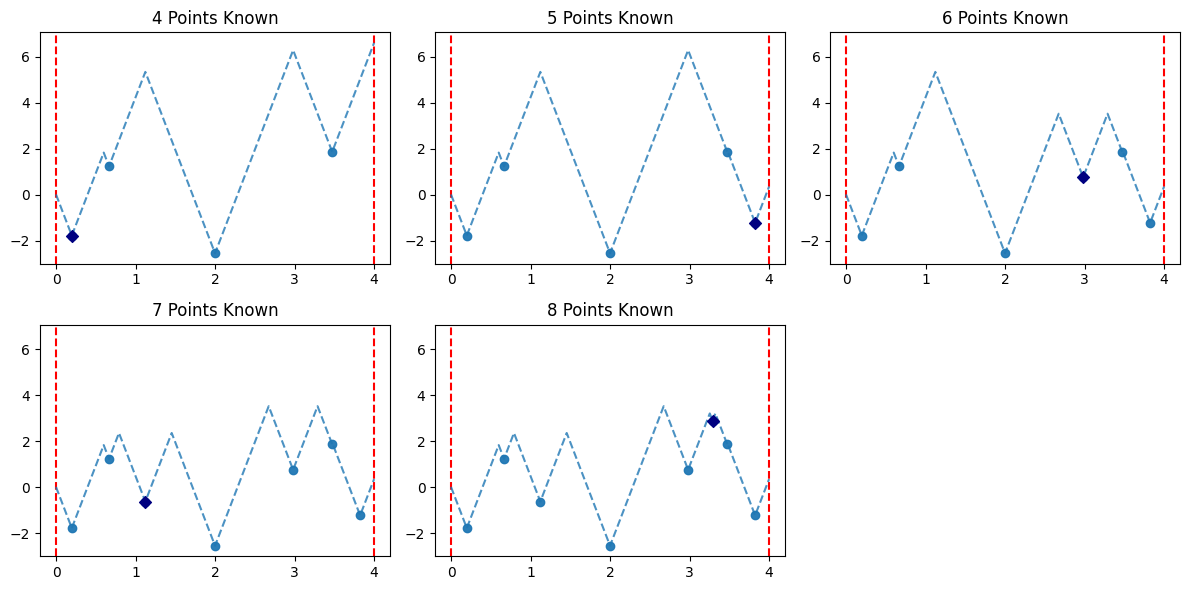

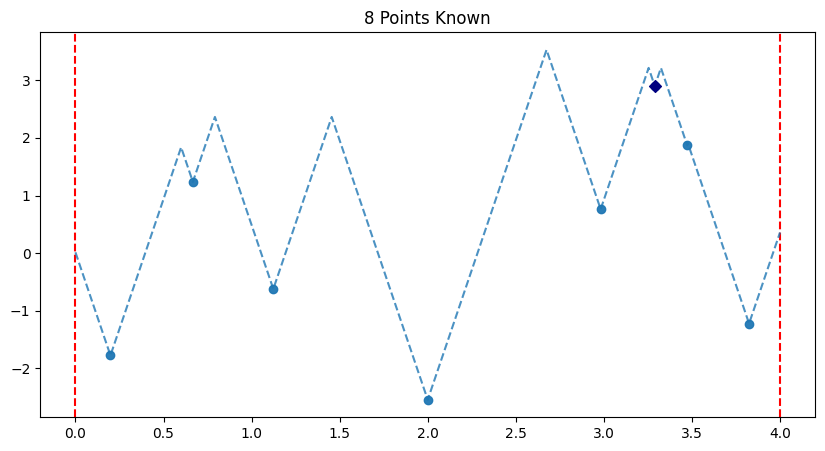

In [5]:
# We choose to display the 5 most recent graphs. Note the final such graph is included in larger size automatically.
# Note the most recently added point in each graph is emphasized.
approximation.display_graphs(5)

## Initializing an `ApproximateMaxima` Class Object

### Initializing with Points

The approximator can be given a list of paired $x$ and $y$ values to start with. The program will raise an exception if the list of points given 
violates the Lipschitz constraint. The order of pairs does not matter.

In [6]:
points=[(1,9),(-6,10),(3,4)]
initialized=ApproximateMaxima([-10,10],3,starting_points=points)

# When added this way only one starting graph is included:
len(initialized.graphs)


1

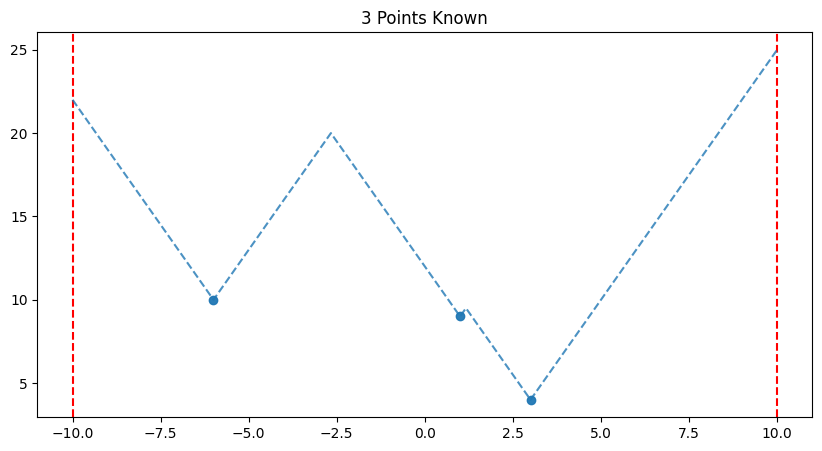

In [7]:
initialized.display_graphs()

## Adding Points

There are two methods designed to easily select and add additional points to the approximator after initialization. The `add_n_points` method chooses $x$-values optimally while the method `add_points_manually` allows the user to select $x$-values.

### Adding Optimally

Points can be added non-adaptively, where all $x$ are chosen simultaneously, or adaptively, where between each choice of $x$ the new configuration is taken into account.

#### Adding Adaptively

Here the sample function is $3\sin(x)$. Note that a new graph is added for each new point.

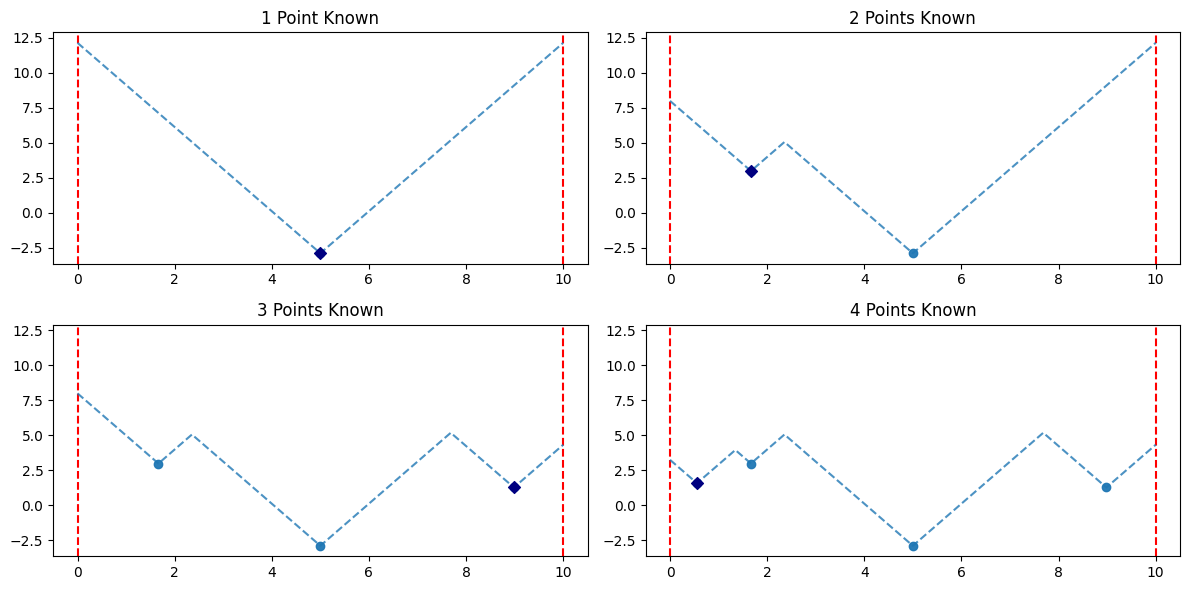

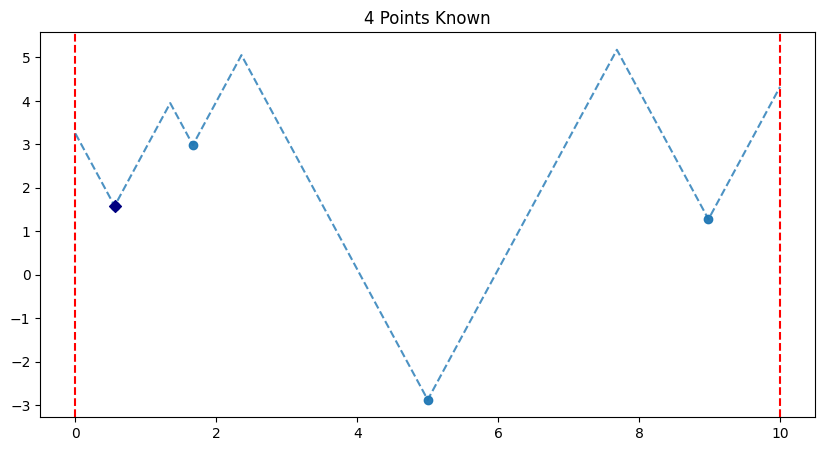

In [8]:
# Creating an approximator on the interval [0,10] with Lipschitz constraint 3 and the .
optimal_example=ApproximateMaxima([0,10],3,sample_function='3*math.sin(x)')

# The function_type parameter refers to the choice of y not the choice of x.
# We add 4 points optimally using the adaptive method.
optimal_example.add_n_points(4,function_type='sample',adaptive=True)
optimal_example.display_graphs()

#### Adding non-adaptively

When adding non-adaptively the choice of $x$-values is completely determined by the state of the approximator when the method is called.  
Here the function is still $3\sin(x)$. Note that when adding non-adaptively only one new graph is added.


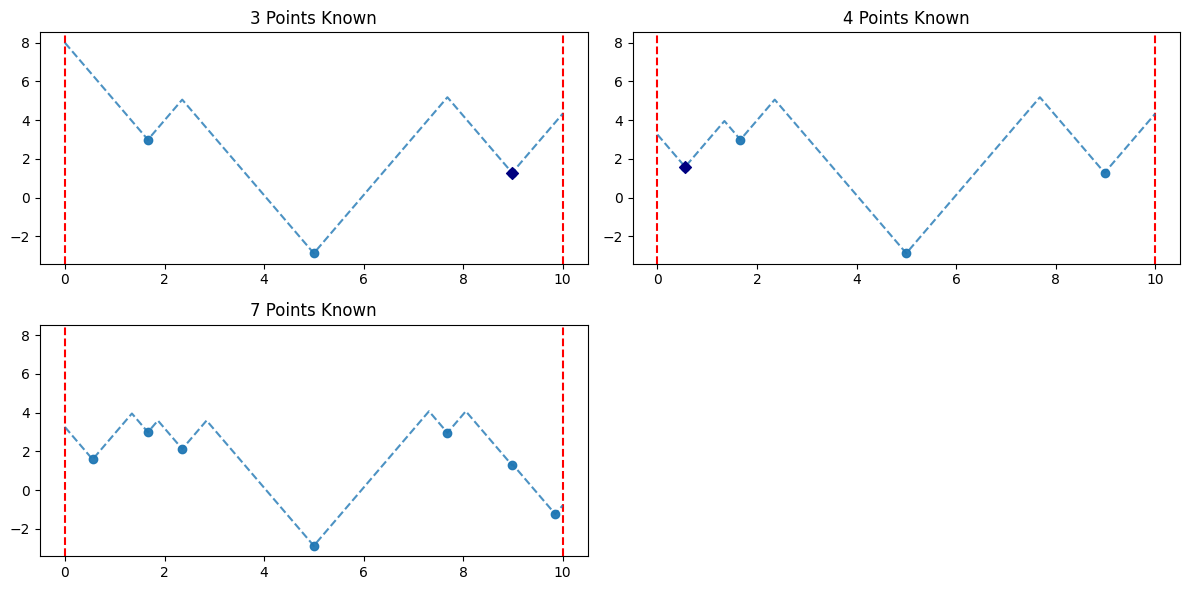

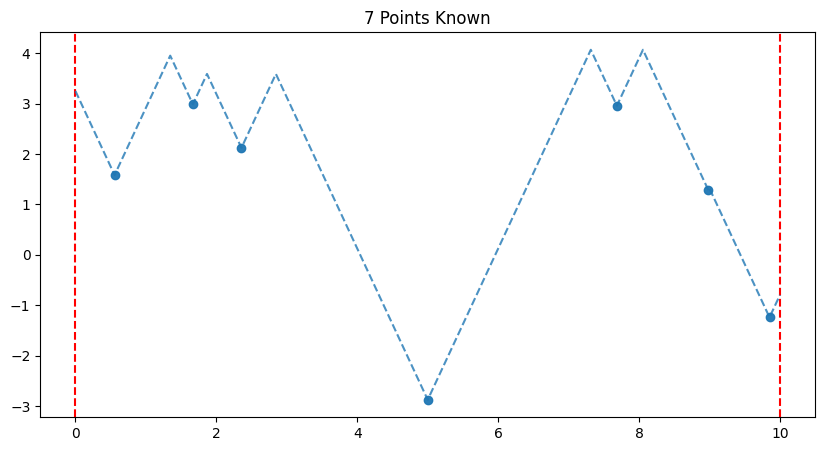

In [9]:
optimal_example.add_n_points(3,function_type='sample',adaptive=False)
optimal_example.display_graphs(3)

### Adding Manually

When adding points manually we can choose to enter points one at a time into the console or feed a list of $x$-values as an input of the
method `add_points_manually`.

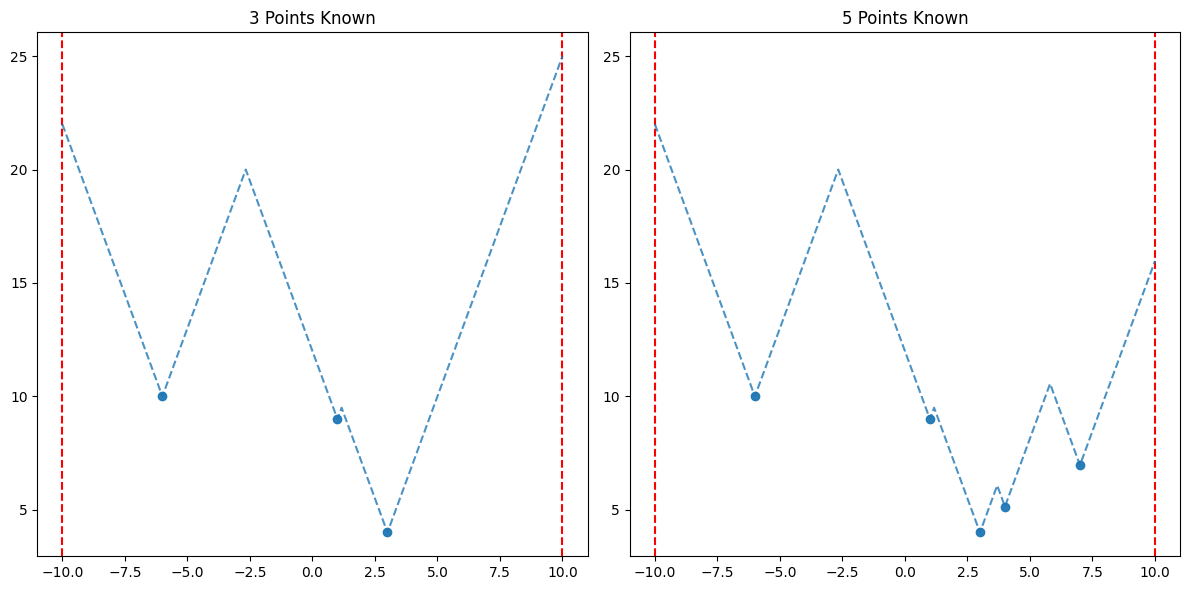

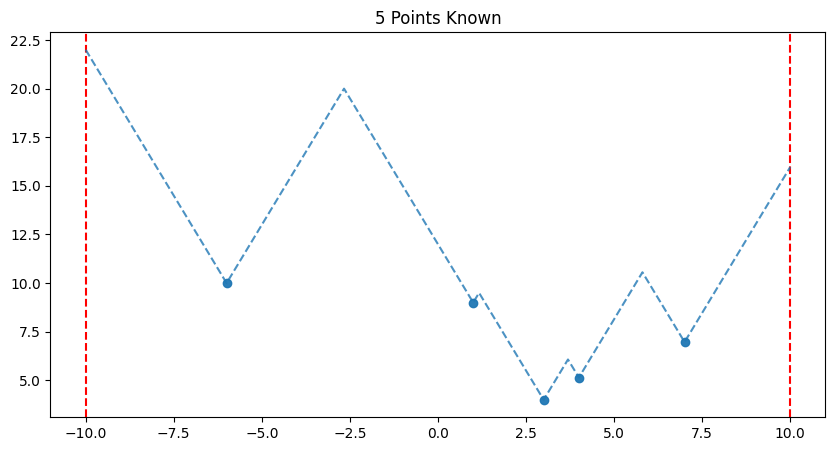

In [10]:
# To add one at a time we input an integer for the parameter user_x.  
# Here we will instead use a list of explicit x-values we want to include.
initialized.add_points_manually(function_type='random',user_x=[4,7])

# Note that only one graph is added when add_points_manually is called this way.
initialized.display_graphs(2)

### Displaying Results

The three main ways to display results are as:
1. A list of chosen points
2. A dataframe showing the accuracy of the approximation at each step.
3. 



In [11]:
# Adding Points
Foo=initialized
[func for func in dir(Foo) if callable(getattr(Foo, func))]

['__class__',
 '__delattr__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_add_graph',
 '_add_one_point',
 '_fit_n_on_interval',
 '_get_interval_xy',
 '_get_manual_x',
 '_get_results',
 '_legal_arrays',
 '_legal_y',
 '_non_adaptive',
 'add_n_points',
 'add_points_manually',
 'display_graphs',
 'get_known_pairs',
 'get_optimal_x',
 'get_y',
 'revert_to_state',
 'update_arrays']